# Исследование объявлений о продаже квартир


#### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Шаг 1. Изучим общую информацию. 

In [85]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [87]:
print('------------total_images---------------')
print(df['total_images'].unique())
print('-------------rooms--------------')
print(df['rooms'].unique())
print('-------------is_apartment--------------')
print(df['is_apartment'].unique())
print('-------------floor--------------')
print(df['floor'].unique())
print('-------------floors_total--------------')
print(df['floors_total'].unique())
print('-------------balcony--------------')
print(df['balcony'].unique())
print('-------------ponds_around3000--------------')
print(df['ponds_around3000'].unique())
print('-------------parks_around3000--------------')
print(df['parks_around3000'].unique())
print('-------------locality_name--------------')
print(df['locality_name'].unique())

------------total_images---------------
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
-------------rooms--------------
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
-------------is_apartment--------------
[nan False True]
-------------floor--------------
[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]
-------------floors_total--------------
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
-------------balcony--------------
[nan  2.  0.  1.  5.  4.  3.]
-------------ponds_around3000--------------
[ 2.  0.  3.  1. nan]
-------------parks_around3000--------------
[ 1.  0.  2. nan  3.]
-------------locality_name--------------
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф

Проверим, что там с дубликатами

In [88]:
df.duplicated().sum()

0

### Вывод

Данные загружены, на первый взгляд ничего совсем страшного нет. Выявлены следующие моменты требующие обработки:
1. Названия столбцов привести к нижнему регистру - cityCenters_nearest;
2. Есть столбцы типа float, которые таковыми быть не должны (не может быть 1,5 балкона или 1,2 парка поблизости). У столбца is_apartment тип object;
3. Есть столбцы с NaN, в которых отсутствующие данные можо просто заменить на 0, так как это особенность выгрузки или просто ошибки пользователей (например,is_apartment, balcony,parks_around3000, ponds_around3000).
4. NaN в столбцах airports_nearest и cityCenters_nearest выглядит странно, так как выгружается автоматически, но видимо в этих случаях аэропорт и центр города находится очень далеко.
5. Странным выглядят квартиры с числом комнат больше 10 - возможно это зАмки, а может ошибка - стоит разобраться.
6. Одно и тоже название местоположения пишется по-разному, например поселок и посёлок. Возможны и другие неточности, скорее всего придётся прибегнуть к лемматизации.
7. Столбец с датой размещения объявления имеет тип object, а нужно бы daytime

### Шаг 2. Предобработка данных

Для предобработки данных возьмём за основу вывод из прошлого пункта и будем действовать по шагам.

Названия столбцов привести к нижнему регистру - cityCenters_nearest;

In [89]:
df = df.rename(columns = {'cityCenters_nearest' : 'city_center_nearest',
                                           'total_images':'total_images', 'last_price' : 'last_price', 'total_area' : 'total_area',
                                            'first_day_exposition' : 'first_day_exposition','rooms' : 'rooms',
                                            'ceiling_height' : 'ceiling_height', 'floors_total' : 'floors_total',
                                            'living_area' : 'living_area', 'floor' : 'floor','is_apartment' : 'is_apartment',
                                            'studio' : 'studio', 'open_plan' : 'open_plan', 'kitchen_area' : 'kitchen_area',
                                            'balcony' : 'balcony','locality_name' : 'locality_name', 'airports_nearest' : 'airports_nearest',
                                            'parks_around3000' : 'parks_around3000', 'parks_nearest' : 'parks_nearest',
                                            'ponds_around3000' : 'ponds_around3000','ponds_nearest' : 'ponds_nearest',
                                            'days_exposition' : 'days_exposition'})

Есть столбцы типа float, которые таковыми быть не должны (не может быть 1,5 балкона или 1,2 парка поблизости). У столбца is_apartment тип object;

Есть столбцы с NaN, в которых отсутствующие данные можо просто заменить на 0, так как это особенность выгрузки или просто ошибки пользователей (например,is_apartment, balcony,parks_around3000, ponds_around3000).

In [90]:
#чтобы Pandas не ругался на преобразования в int, нужно заранее заполнить NaNы.
# в столбце floors_total таких значений 86 или 0,4%, думаю можно их заменить на 1, 
# так как кол-во этажей скорее всего не были указаны для одноэтажных зданий
df['floors_total'] = df['floors_total'].fillna(1).astype(int)

# признак аппартамента переведём в булевый тип. NaNы в этом столбце скорее всего результат пропуска значений пользователем
df['is_apartment'] = df['is_apartment'].fillna(0).astype(bool)

# NaN балкона скорее всего подразумевает его отсутствие, печалит, конечно что таких значений почти половина
df['balcony'] = df['balcony'].fillna(0).astype(int)

# с парками похоже та же проблема. Отмечу, что кол-во данных о парках сопоставимо с кол-вом данных о растоянии до ближайшего парка
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)

# с прудами также - где не указали, та их нет, тем более, что кол-во данных совпадает с данными о расстоянии
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

#также преобразим столбец с ценой - к чему мелочится в вопросе покупки квартиры?
df['last_price'] = df['last_price'].astype(int)

NaN в столбцах airports_nearest и cityCenters_nearest выглядит странно, так как выгружается автоматически, но видимо в этих случаях аэропорт и центр города находится очень далеко.

Заменять эти значения на 0 - некорректно, это существенно исказит данные, тем более квартира не может быть одновременно и в аэропорту и в центре :)

Заменять на среднюю или медиану тоже будет неправильным, так как близость к центру или аэропорту должны добавлять или снижать стоимость, а у нас в датасете есть квартиры, находящиеся, например,  в посёлках в которых эта близость изначально не закладывалась. Поэтому пока оставим всё как есть

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_center_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000        

У нас есть ещё пробелы в данных по размеру кухни, жилой площади и высоты потолков. Можно попробовать заполнить эти данные средней или медианой, при этом не забыв, что для для аппартаментов, студий и свободных планировок, размеры кухонь могут отличаться. "Плясать" будем от общей площади, и для корректности группировки округлим эти значения.


In [92]:
df['total_area'] = df['total_area'].round().astype(int)

Посмотрим, что интересного в NaNах living_area

In [93]:
df[df['living_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
7,5,7915000,72,2019-04-18T00:00:00,2,NaN,24,NaN,22,False,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
30,12,2200000,33,2018-02-19T00:00:00,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.0
37,10,1990000,46,2017-10-28T00:00:00,2,2.5,5,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,0,NaN,0,NaN,196.0
44,13,5350000,40,2018-11-18T00:00:00,1,NaN,22,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN


Особенно эти NaNы ничем не примечательны, кроме того, что среди них также очень много пропусков по площади кухни

In [94]:
# попробуем заполнить данные медианой:
for area in df['total_area'].unique():
        median = df[df['total_area'] == area]['living_area'].median()
        df.loc[(df['living_area'].isnull()) & (df['total_area'] == area),'living_area'] = median

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [95]:
df['living_area'].isnull().sum()

14

Похоже для 14 строк не нашлось подходящей total_area, думаю можно пренебречь таким количеством

In [96]:
df.dropna(subset = ['living_area'],inplace=True)

По аналогии с living_area, заполним высоту потолков и площадь кухни. Не будем делать исключений для студий и аппартаментов, так как таковых у нас всего 199 в суммe (<1%)

In [97]:
for area in df['total_area'].unique():
        median = df[df['total_area'] == area]['ceiling_height'].median()
        df.loc[(df['ceiling_height'].isnull()) & (df['total_area'] == area),'ceiling_height'] = median

In [98]:
# для площади кухни, воспользуемся группировкой жилой площади, помимо общей:
# предварительно округлим жилую площадь, для больших совпадений
df['living_area'] = df['living_area'].round().astype(int)

for area in df['total_area'].unique():
    for l_area in df['living_area'].unique():
        median = df[(df['total_area'] == area) & (df['living_area'] == l_area)]['kitchen_area'].median()
        df.loc[(df['kitchen_area'].isna()) & (df['total_area'] == area) & (df['living_area'] == l_area),'kitchen_area'] = median

In [99]:
df['kitchen_area'].isnull().sum()

174

In [100]:
df['ceiling_height'].isnull().sum()

28

In [101]:
# грустно избавимся от 202 строк данных, не нашедших свою пару в этом мире
df.dropna(subset = ['ceiling_height','kitchen_area'],inplace=True)

Столбец с датой размещения объявления имеет тип object, а нужно бы daytime

In [102]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

Пропуски в данных о количестве дней экспозиции - это норма, так как квартиры, скорее всего ещё в стадии продажи

### Шаг 3. Обработаем данные

In [103]:
# посчитаем площадь квадратного метра
df['square_cost'] = df['last_price']/df['total_area']
df['square_cost'] = df['square_cost'].astype(int)

In [104]:
# посчитаем и добавим день недели, месяц и год публикации объявления
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [105]:
# посчитаем и добавим этаж квартиры; варианты — первый, последний, другой
def the_floors(row):
    try:
        floor = row['floor']
        t_floor = row['floors_total']
        if floor == t_floor:
            return 'последний'
        if floor == 1:
            return 'первый'
        return 'другой'
    except:
        print('что то пошло не так')
        
df['floor_name'] = df.apply(the_floors, axis=1)

In [106]:
# посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей
    
df['l_t_ratio'] = df['living_area']/df['total_area']
df['k_t_ratio'] = df['kitchen_area']/df['total_area']

In [107]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_cost,week_day,month,year,floor_name,l_t_ratio,k_t_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.70,11,19,1,False,...,0,NaN,81.0,83750,1,12,2018,первый,0.475000,0.275000
2,10,5196000,56,2015-08-20,2,2.60,5,34,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.607143,0.148214
3,0,64900000,159,2015-07-24,3,3.00,14,95,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,0.597484,0.132075
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Исследовательский анализ данных

count    23486
mean        59
std         33
min         17
25%         40
50%         52
75%         69
max        900
Name: total_area, dtype: int64


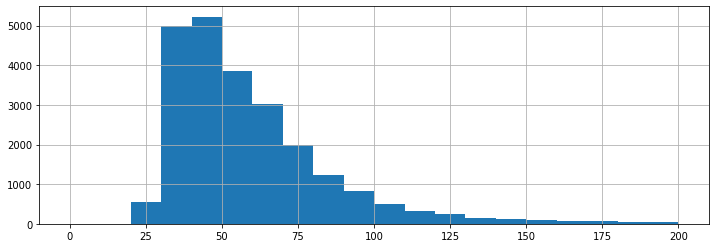

In [108]:
# помотрим что интересного в параметрах площадь, цена, число комнат, высота потолков
# построим гистограммы для каждого параметра 

print(df['total_area'].describe().astype(int))
df['total_area'].hist(bins=20, range = (0,200), figsize = (12,4))

В целом значения выглядят естественно, выбивается максимальное значение - 900 квадратов. Интересно что это за квартира такая?
Ещё на гистограмме интересный спад на 50 гвадратах, и большое кол-во квартир на ~45 квадратах

In [109]:
df.query('total_area>800')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_cost,week_day,month,year,floor_name,l_t_ratio,k_t_ratio
19540,8,420000000,900,2017-12-06,12,2.8,25,410,25,False,...,2,318.0,106.0,466666,2,12,2017,последний,0.455556,0.124444


вот кому на руси жить хорошо - 900 квадратов на 25 этаже. Чтоб я так жил.

count        23486
mean       6396013
std        9977381
min          12190
25%        3436050
50%        4650000
75%        6750000
max      763000000
Name: last_price, dtype: int64


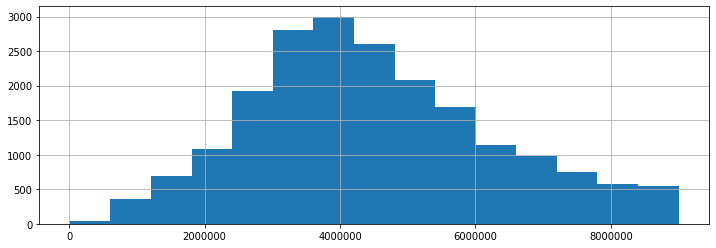

In [110]:
print(df['last_price'].describe().astype(int))
df['last_price'].hist(bins=15, range = (12190,9000000), figsize = (12,4))

Дорогие квартиры существенно влияют на медианное значение, из-за чего среднее близко к 75% квартилю. В целом распределние цен выглядит нормально.

In [111]:
df.query('last_price>700000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_cost,week_day,month,year,floor_name,l_t_ratio,k_t_ratio
12971,19,763000000,400,2017-09-30,7,3.05,10,250,10,False,...,3,756.0,33.0,1907500,5,9,2017,последний,0.625,0.125


count    23486
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         16
Name: rooms, dtype: int64


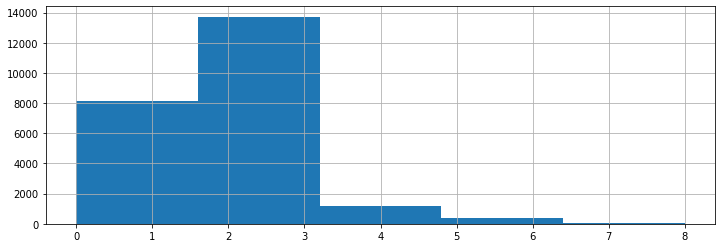

In [112]:
print(df['rooms'].describe().astype(int))
df['rooms'].hist(bins = 5,range = (0,8), figsize = (12,4))

похоже, кто то живёт в гостинице, иначе сложно объяснить проживание в 16-ти комнатной квартире.

In [113]:
df.query('rooms>13')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_cost,week_day,month,year,floor_name,l_t_ratio,k_t_ratio
866,5,25000000,363,2017-12-23,14,3.16,5,222,4,False,...,2,435.0,418.0,68870,5,12,2017,другой,0.611570,0.045730
5358,20,65000000,590,2019-02-14,15,3.50,6,409,3,False,...,0,NaN,14.0,110169,3,2,2019,другой,0.693220,0.169492
18848,6,28500000,270,2015-03-02,16,3.00,4,180,4,False,...,0,NaN,1365.0,105555,0,3,2015,последний,0.666667,0.048148
20829,6,28659000,245,2016-03-31,14,3.52,4,168,2,False,...,2,118.0,95.0,116975,3,3,2016,другой,0.685714,0.105714


11 квадратов на комнату, похоже так и есть - гостиница

count    23486
mean         2
std          0
min          1
25%          2
50%          2
75%          2
max        100
Name: ceiling_height, dtype: int64


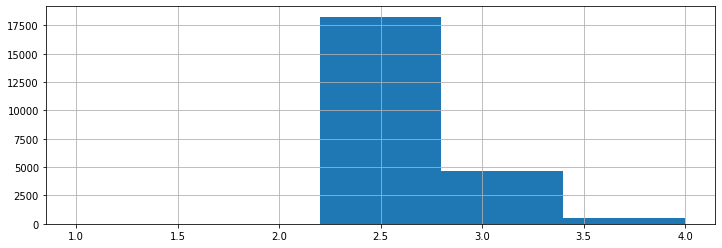

In [114]:
print(df['ceiling_height'].describe().astype(int))
df['ceiling_height'].hist(bins = 5,range = (1,4), figsize = (12,4))

похоже Мерлин тоже решил продать свою башню с потолком в 100 метров. А на графике, основная часть потолков на 2,5 метра

total_area
count    23486
mean        59
std         33
min         17
25%         40
50%         52
75%         69
max        900
Name: total_area, dtype: int64


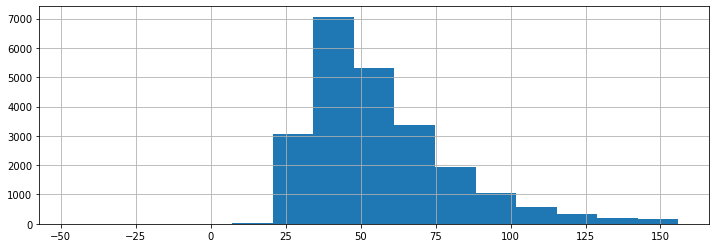

last_price
count        23486
mean       6396013
std        9977381
min          12190
25%        3436050
50%        4650000
75%        6750000
max      763000000
Name: last_price, dtype: int64


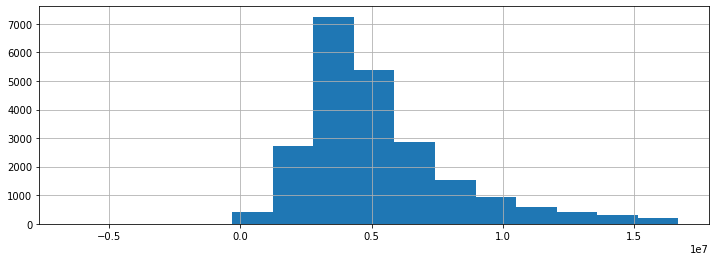

rooms
count    23486
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         16
Name: rooms, dtype: int64


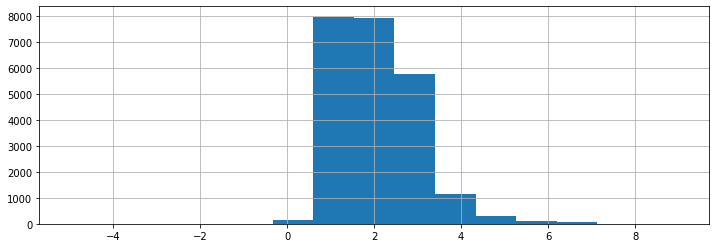

ceiling_height
count    23486
mean         2
std          0
min          1
25%          2
50%          2
75%          2
max        100
Name: ceiling_height, dtype: int64


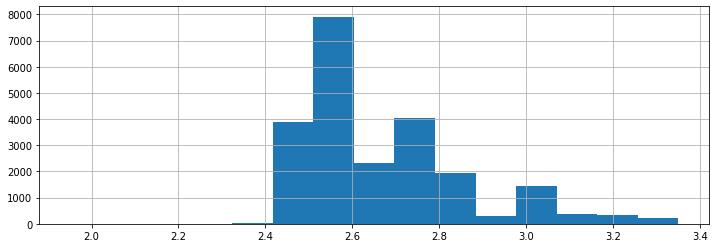

days_exposition
count    20328
mean       180
std        219
min          1
25%         45
50%         96
75%        231
max       1580
Name: days_exposition, dtype: int64


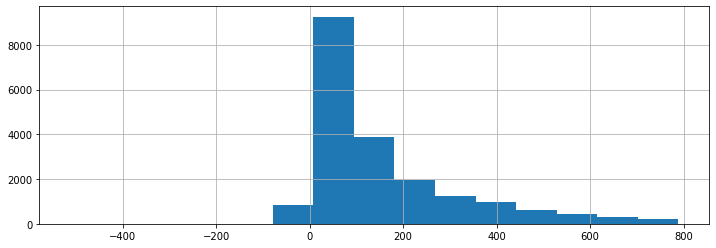

In [115]:
# для дальнейшей работы напишем функцию, которая будет строить графики автоматически:
columns= ['total_area','last_price','rooms','ceiling_height','days_exposition']
def hist_drawer(df, columns):
    for column in columns:
        q1 = df[column].describe()[4]
        q2 = df[column].describe()[6]
        iqr = q2-q1
        df[column].hist(bins = 15,range = (q1-3*iqr,q2+3*iqr), figsize = (12,4))
        print(column)
        print(df[column].describe().astype(int))
        plt.show()
hist_drawer(df, columns)    

###  "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

count    20328.000000
mean       180.630805
std        219.217406
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


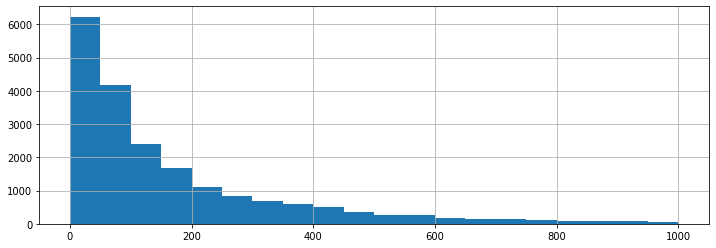

In [116]:
df['days_exposition'].hist(bins = 20,range=(0,1000),figsize=(12,4))
print(df['days_exposition'].describe())

Гистограмма похожа на распределение Пуассона. Средний срок продажи 180 дней, а медианный 96 - похоже есть квартиры, которые продаются по несколько лет (что видно и на графике). Максимальный срок продажи - 4 года (интересно насколько упала за это время цена?).
Ориентируясь на квартили можно сказать, что продажа за 45 дней - хороший результат. Если продажа затянулась на 230+ дней - похоже что-то не так с ценой или объявлением.

### Уберем редкие и выбивающиеся значения.

In [118]:

# создадим новый DF, оставив значения, с которыми будем работать
new_data = df[['last_price','total_area','rooms', 'ceiling_height', 'living_area', 'square_cost', 'days_exposition','city_center_nearest']]

In [119]:
# напишем функцию, которая на вход получит df, а на выходе df с очищенными значениями,
# входящими в пределы 1.5 кратного межквартильного размаха (99%)

def equalizer(df,columns = []):
    if len(columns) == 0:
        columns = df.columns
    new_df = pd.DataFrame(columns = None)
    for column in columns:
        q1 = df[column].describe()[4]
        q2 = df[column].describe()[6]
        col = column
        iqr = q2-q1
        top = q2 + iqr*1.5
        bottom = q1 - iqr*1.5
        new_df[column] = df[(df[column]<top) & (df[column]>bottom)][column]
    
    return new_df  
    
new_data = equalizer(new_data)    

last_price
count       21478
mean      4836382
std       2198942
min         12190
25%       3300000
50%       4400000
75%       5999000
max      11703236
Name: last_price, dtype: int64


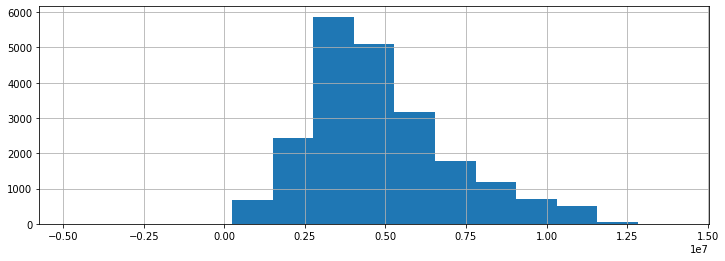

total_area
count    21273
mean        52
std         17
min         17
25%         39
50%         49
75%         63
max        112
Name: total_area, dtype: int64


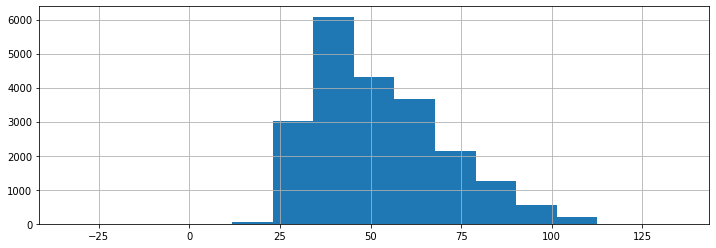

rooms
count    21463
mean         1
std          0
min          0
25%          1
50%          2
75%          3
max          5
Name: rooms, dtype: int64


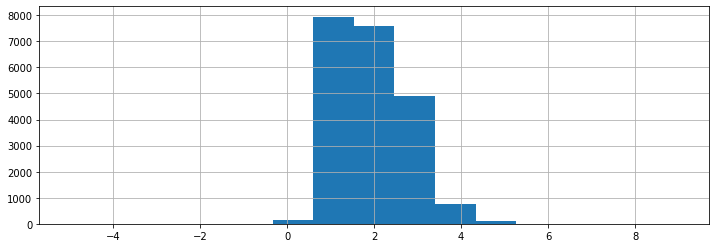

ceiling_height
count    20574
mean         2
std          0
min          2
25%          2
50%          2
75%          2
max          3
Name: ceiling_height, dtype: int64


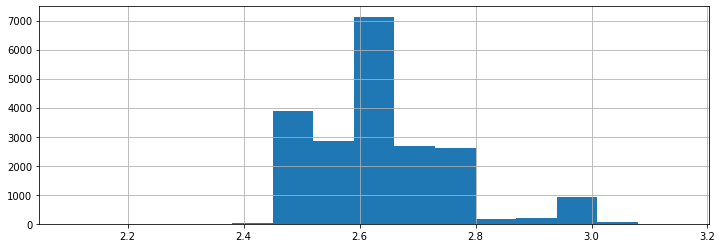

living_area
count    21365
mean        30
std         12
min          2
25%         18
50%         29
75%         39
max         76
Name: living_area, dtype: int64


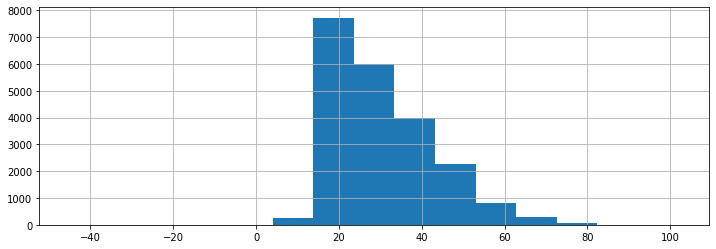

square_cost
count     21131
mean      91497
std       27396
min       20000
25%       74766
50%       92352
75%      108571
max      170416
Name: square_cost, dtype: int64


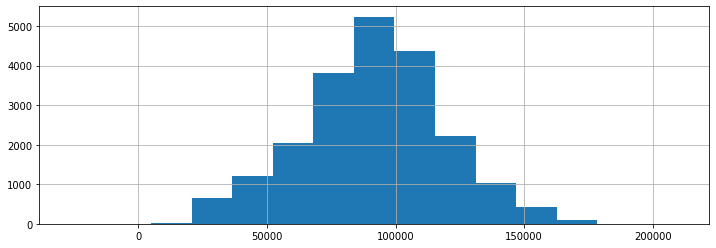

days_exposition
count    17433
mean       125
std        119
min          1
25%         40
50%         81
75%        179
max        509
Name: days_exposition, dtype: int64


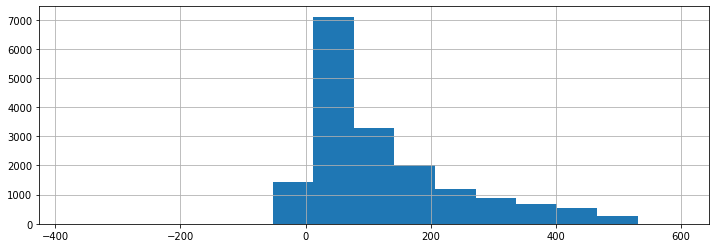

In [120]:
#посмотрим на красоту на графиках
columns = ['last_price','total_area','rooms', 'ceiling_height', 'living_area', 'square_cost', 'days_exposition']
hist_drawer(new_data,columns)

После очистки выбивающихся значений, графики больше стали похожи на "нормальные". При этом ceiling_height  имеет 2 горба возможно это связано с разным типом квартир (аппартаменты, старый фонд или прочее). Значения средних приблизились к медиане - и это хороший знак.

### Оценим какие факторы больше всего влияют на стоимость квартиры? Посмотрим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года. 

In [121]:
print(new_data['last_price'].corr(new_data['total_area']))

0.6876620932914821


Судя по всему, зависимость есть, и она достаточно высокая, что логично.

In [122]:
print(new_data['last_price'].corr(new_data['rooms']))

0.44501127863966505


Как оказалось, количество комнат не сильно связано с ценой, либо зависимость не линейная

In [124]:
print(new_data['last_price'].corr(new_data['city_center_nearest']))

-0.38238658100662626


Расстояние до центра слабо влияет на цену, либо влияет но не напрямую.

In [125]:
cor_floor = df[['last_price','floor_name']]

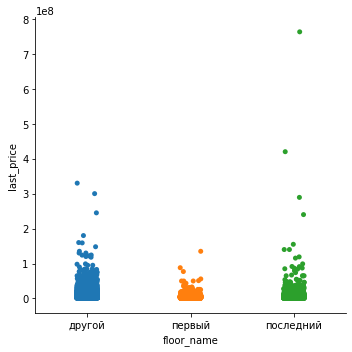

In [126]:
sns.catplot(x="floor_name", y="last_price", data=cor_floor)

Похоже, самый популярный этаж - другой. На первом этаже больше дешёвых квартир.

In [127]:
print(df['last_price'].corr(df['year']))
print(df['last_price'].corr(df['month']))
print(df['last_price'].corr(df['week_day']))

-0.033353433390855815
0.0057932280310008764
-0.004813460211608055


Похоже период размещения никак не сказывается на цене, это и логично, учитывая "товар".

In [128]:
city_price = new_data[['last_price','total_area']]
city_price = city_price.join(df['locality_name'])

In [129]:
#отберём ТОП 10 мест по числу объявлений
top10 = city_price.groupby('locality_name').count().sort_values(by='total_area',ascending=False).head(10).index
top10

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

In [130]:
#оставим объявления только из ТОП10 городов
top10_city_price = city_price.query('locality_name in @top10')
#посмотрим, на самые дорогие квартиры в городе
top10_city_price.pivot_table(index = 'locality_name', aggfunc = {'last_price':'max'} ).sort_values(by = 'last_price',ascending=False)

,last_price
locality_name,
Санкт-Петербург,11703236
Пушкин,11350000
Всеволожск,11000000
посёлок Шушары,10990000
деревня Кудрово,10500000
Гатчина,9500000
Выборг,9200000
посёлок Парголово,9140000
Колпино,8600000


In [131]:
top10_city_price.pivot_table(index = 'locality_name', aggfunc = {'last_price':'min'} ).sort_values(by = 'last_price')

,last_price
locality_name,
Санкт-Петербург,12190
Выборг,600000
Гатчина,850000
Всеволожск,965780
посёлок Мурино,1730000
посёлок Шушары,1780000
деревня Кудрово,1800000
посёлок Парголово,1800000
Пушкин,1990000


Удивительно, но Санкт-Петербург - город квартирных контрастов, здесь обнаружилось как самое дорогое, так и самое дешёвое жильё

In [132]:
# средняя цена квадратного метра:
for name,data in top10_city_price.groupby('locality_name'):
    
    print(name, (data['last_price'].sum()/data['total_area'].sum()).round())

Всеволожск 67917.0
Выборг 62819.0
Гатчина 69069.0
Колпино 74102.0
Пушкин 101129.0
Санкт-Петербург 106132.0
деревня Кудрово 90720.0
посёлок Мурино 82998.0
посёлок Парголово 87710.0
посёлок Шушары 77835.0


В лидерах, как и ожидалось Санкт-Петербург, но от него не сильно отстаёт Пушкин

### Изучим предложения квартир.

last_price
count        15499
mean       7825240
std       11852966
min          12190
25%        4200000
50%        5500000
75%        8005902
max      763000000
Name: last_price, dtype: int64


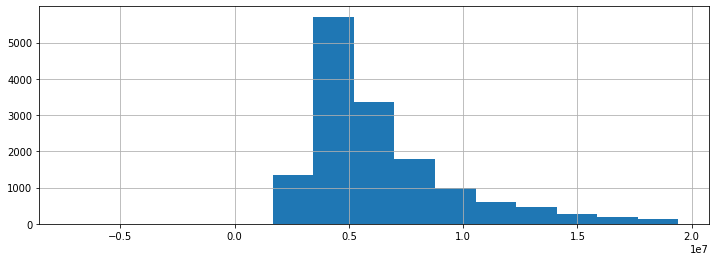

total_area
count    15499
mean        63
std         37
min         17
25%         42
50%         55
75%         74
max        900
Name: total_area, dtype: int64


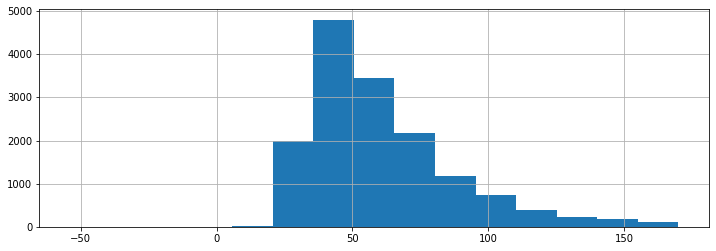

rooms
count    15499
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         16
Name: rooms, dtype: int64


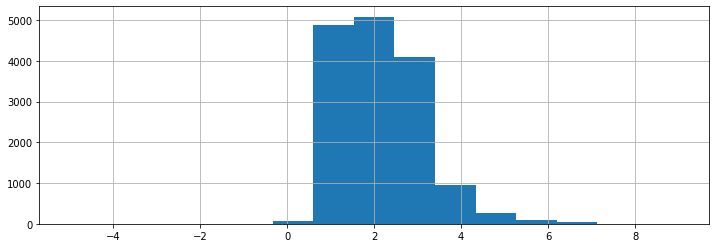

ceiling_height
count    15499
mean         2
std          1
min          1
25%          2
50%          2
75%          2
max        100
Name: ceiling_height, dtype: int64


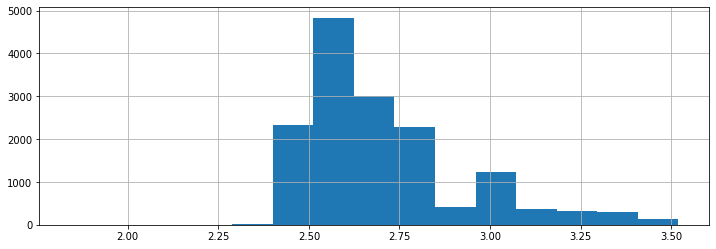

In [134]:
# создадим DF с нужными колонками и отсортируем по Питеру
piter_all = df[['last_price','total_area','rooms','ceiling_height','floor_name','week_day', 'month',
                'year','locality_name','city_center_nearest']]
piter_all = piter_all.query('locality_name == "Санкт-Петербург"')
# есть около 50 объявлений без указания расстояния до центра, расстанемся с ними без сожалений
piter_all = piter_all.dropna()
#посмотрим на графики
columns = ['last_price','total_area','rooms','ceiling_height']
hist_drawer(piter_all, columns)

In [135]:
# создадим колонку с переводом расстояния в км
piter_all['to_center'] = (piter_all['city_center_nearest']/1000).round(0)
piter_all['to_center'] = piter_all['to_center'].astype(int)
piter_all.head()

,last_price,total_area,rooms,ceiling_height,floor_name,week_day,month,year,locality_name,city_center_nearest,to_center
0,13000000,108,3,2.70,другой,3,3,2019,Санкт-Петербург,16028.0,16
2,5196000,56,2,2.60,другой,3,8,2015,Санкт-Петербург,13933.0,14
3,64900000,159,3,3.00,другой,4,7,2015,Санкт-Петербург,6800.0,7
4,10000000,100,2,3.03,другой,1,6,2018,Санкт-Петербург,8098.0,8
7,7915000,72,2,2.70,другой,3,4,2019,Санкт-Петербург,11634.0,12


In [136]:
#посчитаем цену км
piter_all['price_per_km'] = piter_all['last_price']/piter_all['to_center']/1000
# уберем квартиры, которые находятся на расстоянии 0 км от центра
piter_all = piter_all.query('to_center > 0')
piter_all.head()

,last_price,total_area,rooms,ceiling_height,floor_name,week_day,month,year,locality_name,city_center_nearest,to_center,price_per_km
0,13000000,108,3,2.70,другой,3,3,2019,Санкт-Петербург,16028.0,16,812.500000
2,5196000,56,2,2.60,другой,3,8,2015,Санкт-Петербург,13933.0,14,371.142857
3,64900000,159,3,3.00,другой,4,7,2015,Санкт-Петербург,6800.0,7,9271.428571
4,10000000,100,2,3.03,другой,1,6,2018,Санкт-Петербург,8098.0,8,1250.000000
7,7915000,72,2,2.70,другой,3,4,2019,Санкт-Петербург,11634.0,12,659.583333


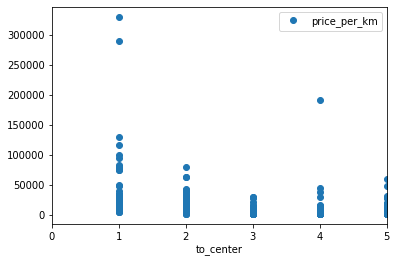

In [137]:
#посмотрим график
center = piter_all[['to_center','price_per_km']].plot(x='to_center', style = 'o',xlim = (0,5))

Похоже, ниже всего цена за км начинается с 3го километра, видимо тут и кончается центр, талее точки становятся более редкими.

### Выделим сегмент квартир в центре и изучим основные параметры: площадь, цена, число комнат, высота потолков. 

last_price
count          828
mean      14823350
std       21399365
min        2385000
25%        7285250
50%        9527500
75%       14492500
max      330000000
Name: last_price, dtype: int64


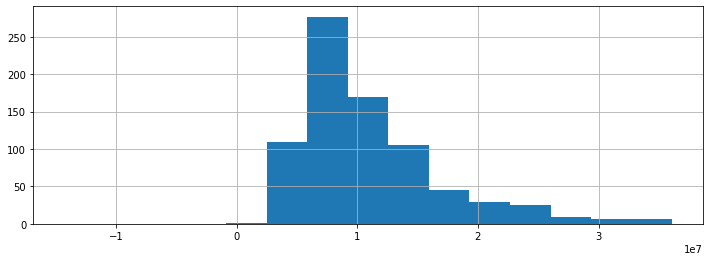

total_area
count    828
mean      96
std       52
min       20
25%       63
50%       83
75%      114
max      484
Name: total_area, dtype: int64


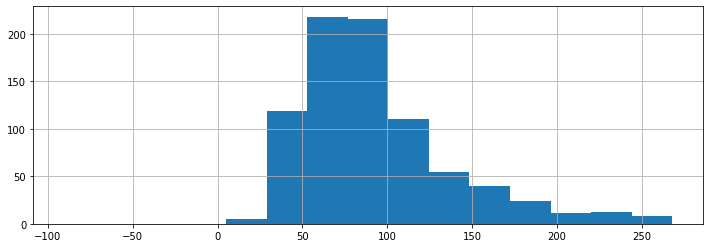

rooms
count    828
mean       3
std        1
min        0
25%        2
50%        3
75%        4
max       14
Name: rooms, dtype: int64


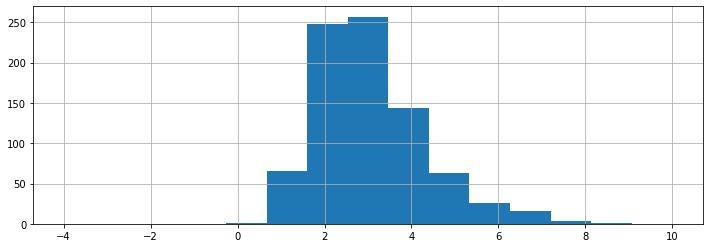

ceiling_height
count    828
mean       3
std        0
min        2
25%        2
50%        3
75%        3
max       27
Name: ceiling_height, dtype: int64


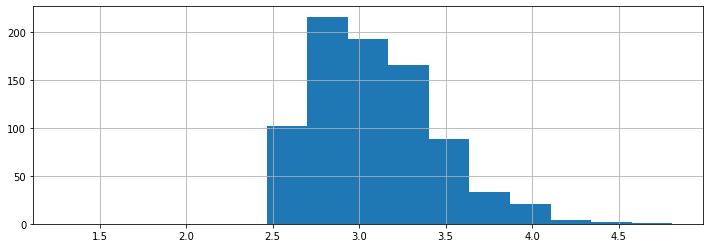

In [138]:
# отсортируем Питерские квартиры, находящиеся в пределах 3 км от центра
piter_center = piter_all.query('to_center <=3')
# посмотрим на графики
columns = ['last_price','total_area','rooms','ceiling_height']
hist_drawer(piter_center, columns)

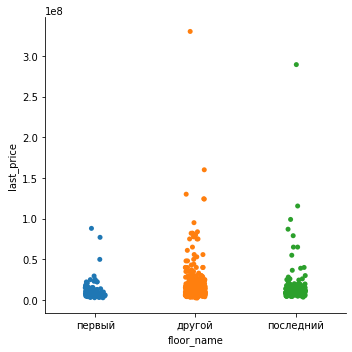

In [139]:
sns.catplot(x="floor_name", y="last_price", data=piter_center)

Анализиуя данные центра Питера, в сравнении со всем городом, можно выжелить следующие ключевые моменты:
1. Высота потолков в центре на 1 метр больше (среднее и медианное значение 3, против 2 во всём городе)
2. В центре самая популярная квартира для продажи состоит из 3х комнат, в отличие от 2х комнатных квартир по всему городу.
3. Медианное значение площади квартиры в центре в 1.5 раза больше чем в остальной его части
4. Ну и конечно, все вышеперечисленное не могло не сказаться на цене. Медианная цена квартиры в 1.7 раз выше для центра
5. Заметны значительные выбросы в зависимости от этажа категории "Другой"

In [140]:
piter_all.corr()['last_price']

last_price             1.000000
total_area             0.647920
rooms                  0.372355
ceiling_height         0.090888
week_day               0.002375
month                  0.002786
year                  -0.031768
city_center_nearest   -0.256548
to_center             -0.256316
price_per_km           0.740352
Name: last_price, dtype: float64

In [141]:
piter_center.corr().loc['last_price']

last_price             1.000000
total_area             0.530736
rooms                  0.242271
ceiling_height         0.087678
week_day              -0.006684
month                 -0.012473
year                   0.006475
city_center_nearest   -0.151912
to_center             -0.166637
price_per_km           0.936400
Name: last_price, dtype: float64

При сравнении факторов, оказывающих наибольшее влияние на цену продажи, можно отметить более слабую корреляцию в центре, чем для всего города. Вероятно, желающие жить в центре готовы доплачивать за что то не формализованное в виде квадратов жилой площаи, высоты потолков и прочего.

### Шаг 5. Общий вывод

Подводя итоги в контексте задания - оценки параметров квартир для отслеживания аномалий и мошеннической деятельности, можно сделать следующие выводы:
1. Примерно 5-7% объявлений выбиваются за пределы 1.5 IQR по основным параметрам (цена, этаж, кол-во комнат, высота потолков), та такие объяевления следует обращать внимание в первую очередь. При этом, возможно следует уменьшить множитель размаха, так как в Питере, в выборке осталась квартира ценой 12 190, что выглядит очень подохрительно.
2. Есть обявления, находящиеся на размещении слишком долго (больше 230 дней) - скорее всего с тамими объявлениями что то не так.
3. Определена средняя цена квадратного метра для питера и области, при этом если цена для питера в том числе сильно зависит от расстояния до центра (3 км), то в области скорее всего такой зависимости нет и стоит обращать на существенные отклонения здесь.
4. Наибольшее влияние на цену квартиры оказывают 3 фактора: площадь, кол-во комнат, расстояние до центра. При поиске аномалий и мошеннических действий в первую очередь следует сосредоточится на этих критериях.